## K Nearest Neighbors

#### Project exercise

In [14]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
sns.set_theme(style="darkgrid")

%matplotlib inline

## Get the Data

In [15]:
df = pd.read_csv("KNN_Project_Data.csv")
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [17]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

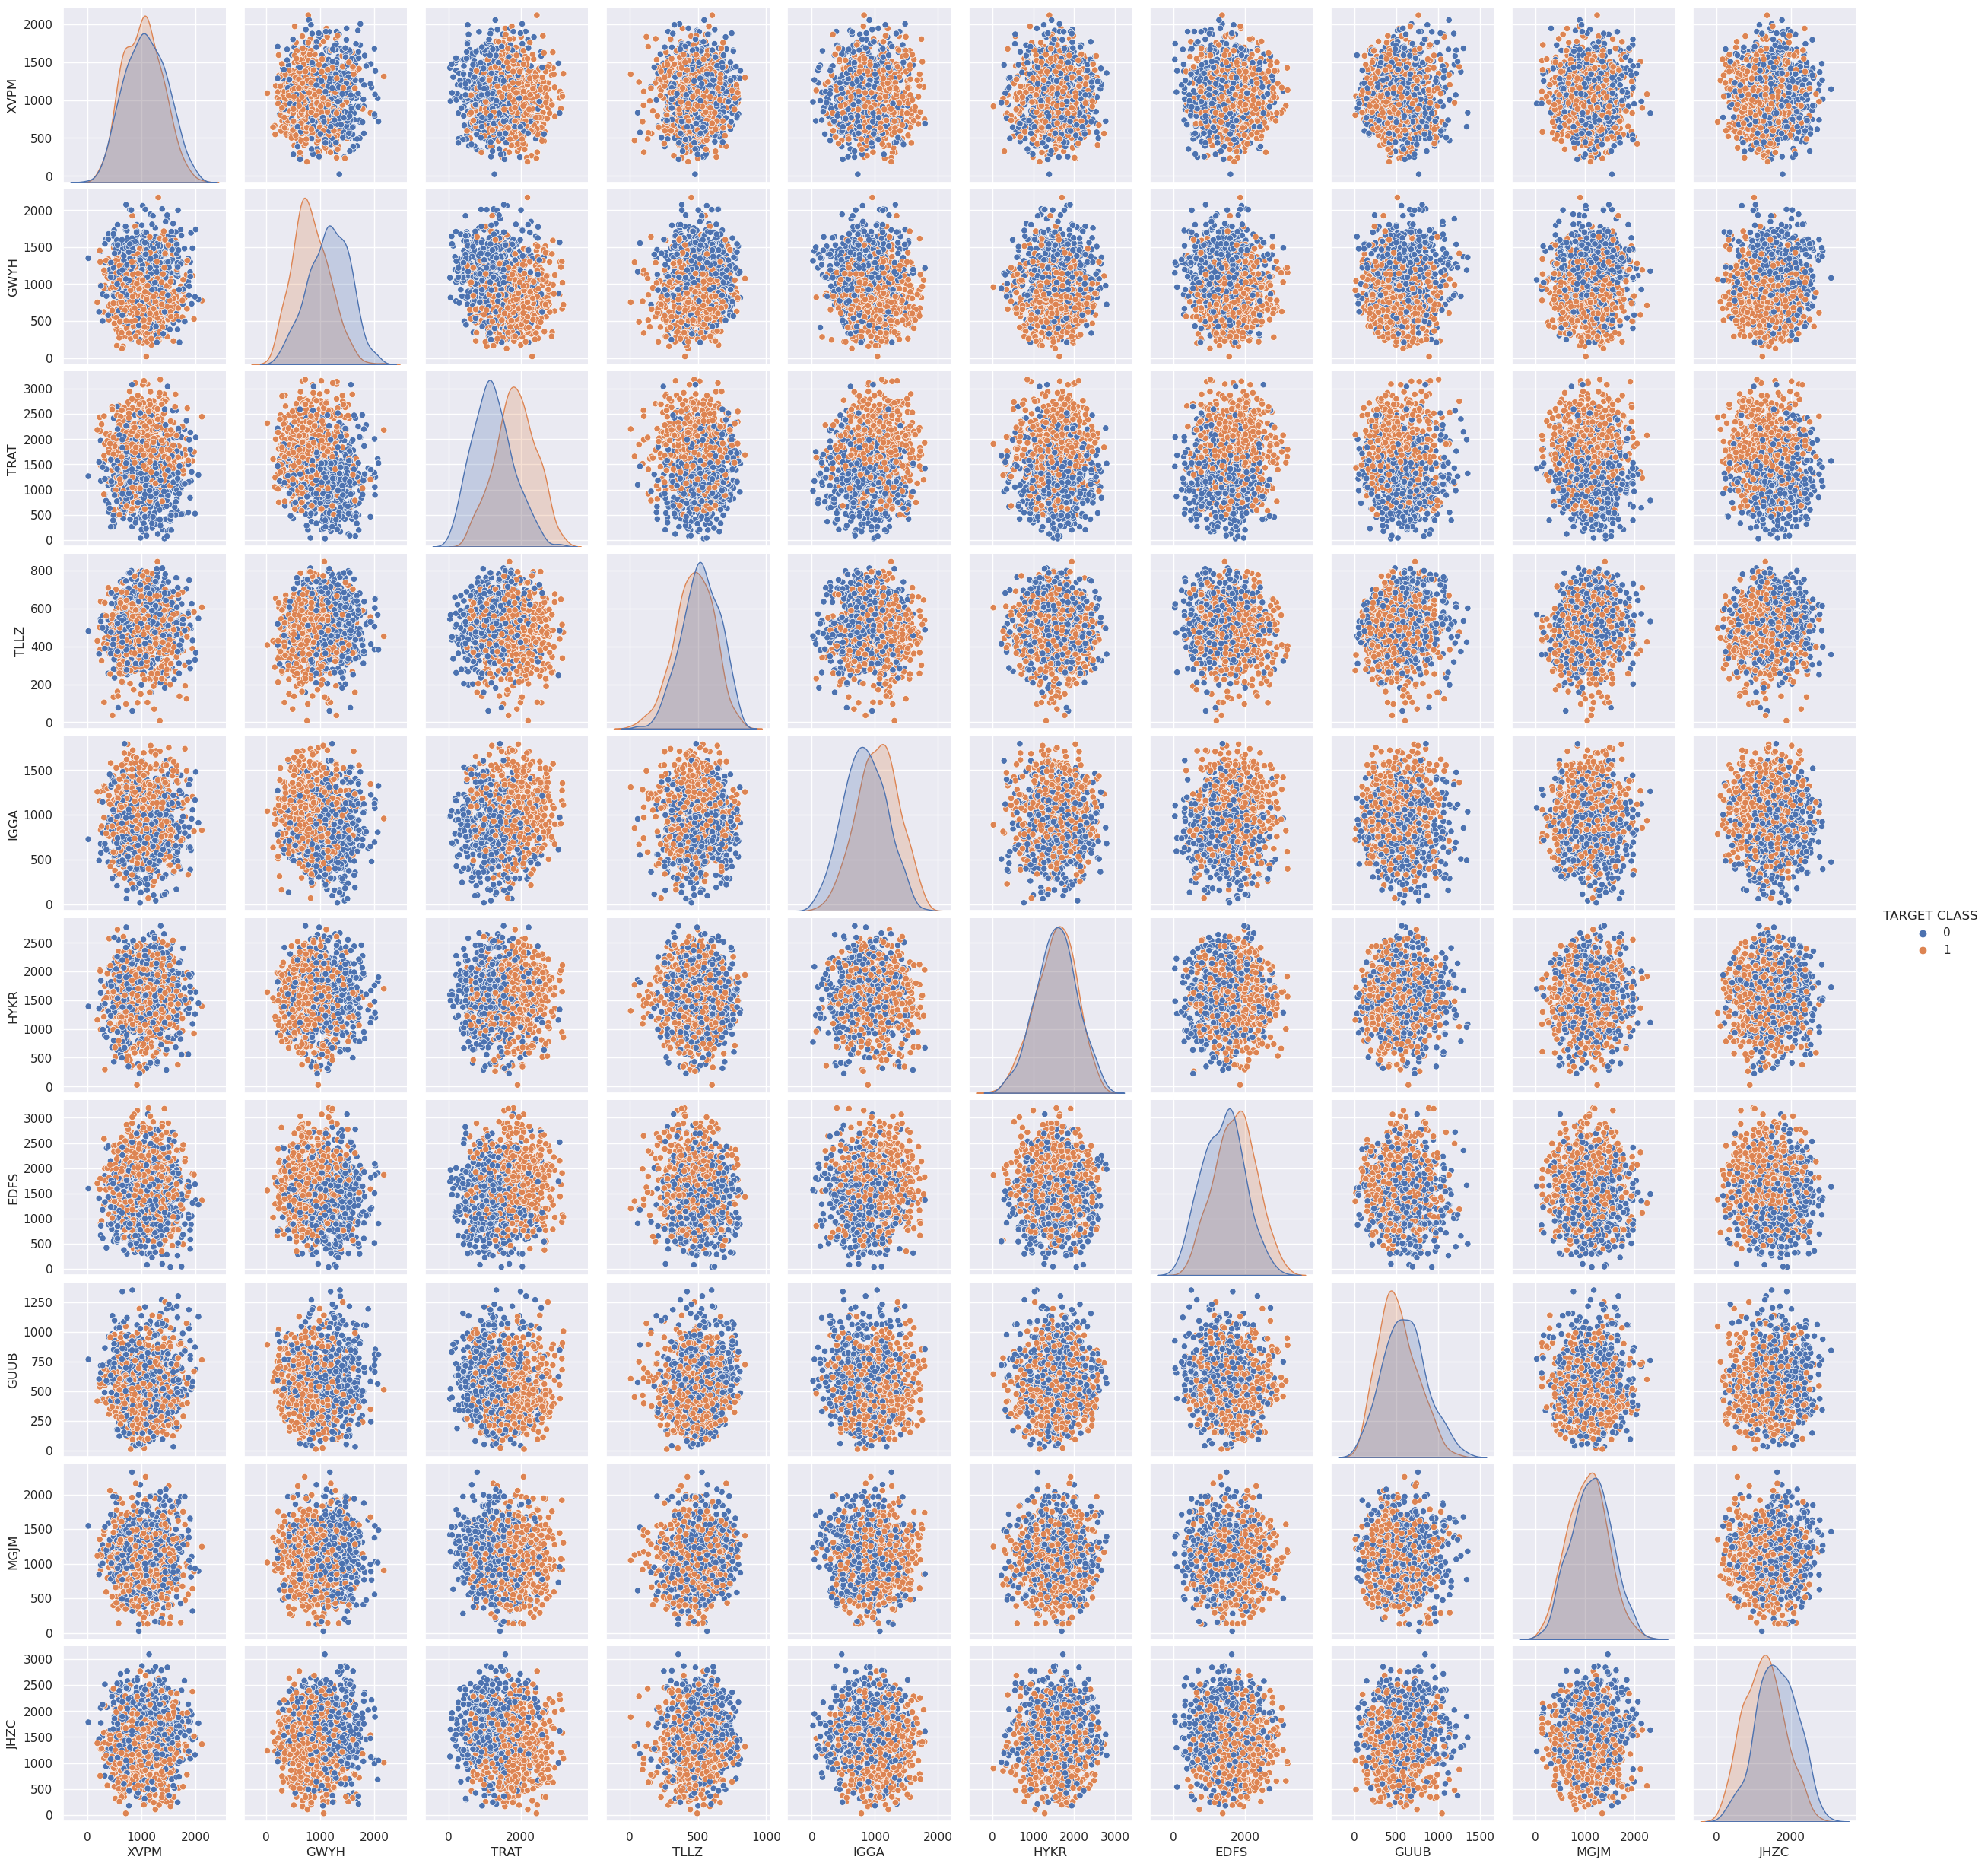

In [18]:
sns.pairplot(
    data=df, hue="TARGET CLASS"
)

## Standardize the Variables

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

Dropping the TARGET CLASS

In [21]:
df_drop = df.drop("TARGET CLASS", axis=1)

In [22]:
scaler.fit(df_drop)

StandardScaler()

In [23]:
scaled_features = scaler.transform(df_drop)

In [24]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [25]:
df_feat.describe()

XVPM          GWYH          TRAT          TLLZ          IGGA  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.743050e-17  1.844080e-16  3.064216e-17  1.534328e-16 -1.423306e-16   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -2.788339e+00 -2.474303e+00 -2.340083e+00 -3.409927e+00 -2.668575e+00   
25%   -7.757873e-01 -7.574735e-01 -7.293713e-01 -6.538711e-01 -6.936419e-01   
50%   -2.472083e-02 -3.442255e-02 -1.072910e-02  3.566665e-02 -3.590482e-03   
75%    7.308466e-01  7.235137e-01  7.215308e-01  7.386505e-01  6.998930e-01   
max    2.863927e+00  3.009948e+00  2.579241e+00  2.451642e+00  2.465393e+00   

               HYKR          EDFS          GUUB          MGJM          JHZC  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean  -2.751133e-16 -1.726397e-16 -6.905587e-17 -5.173639e-16 -1.110223e-19  
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  
min   -3.087121e+00 -2.555607e+00 -2.215822e+00 -2.648319e+00 -2.503543e+00  
25%   -6.718168e-01 -7.168625e-01 -7.266069e-01 -7.136450e-01 -6.921254e-01  
50%    2.911148e-02  8.155695e-03 -8.463946e-02  2.489807e-02 -1.931429e-02  
75%    6.919471e-01  7.032086e-01  6.650219e-01  6.978394e-01  7.253420e-01  
max    2.518753e+00  2.732696e+00  3.198000e+00  3.060964e+00  2.881896e+00

## Train Test Split

Features

In [26]:
X = scaled_features

y = df["TARGET CLASS"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Using KNN

The model will predict whether someone will TARGET CLASS or not. Starting with k = 1

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
predictions = knn.predict(X_test)

## Predictions and Evaluations

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(confusion_matrix(y_test, predictions))

[[110  36]
 [ 47 107]]


In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



## Choosing a K value

Using elbow method to pick a good K value

In [37]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

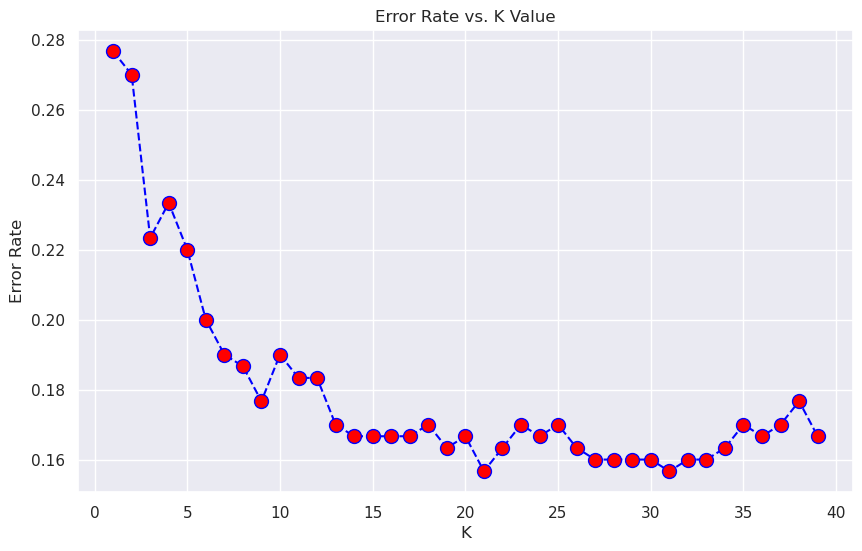

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="--", marker="o",
         markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

The error rate of K = 21 is near 0.16

Evaluation of the model with k = 21

In [39]:
knn = KNeighborsClassifier(n_neighbors=21)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [41]:
predictions = knn.predict(X_test)

In [42]:
print(confusion_matrix(y_test, predictions))

[[125  21]
 [ 26 128]]


In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.86      0.83      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

